In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# importing data
df=pd.read_csv(r'C:\Users\NOEL\Desktop\data\insurance\insurance.csv')

In [3]:
# making a data frame
data=pd.DataFrame(df)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#check for null values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# check datatypes
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

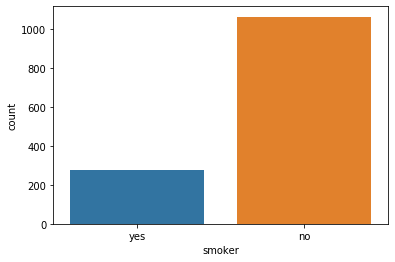

In [8]:
#visualisation
sns.countplot('smoker',data=data)

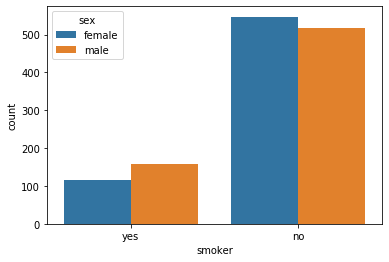

In [9]:
sns.countplot('smoker',hue='sex',data=data)

#### Data Preprocessing

In [10]:
gender=pd.get_dummies(data['sex'],drop_first=True)
gender.head(10)

,male
0,0
1,1
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,0


In [11]:
smoke=pd.get_dummies(data['smoker'],drop_first=True)
smoke.head(10)

,yes
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [12]:
reg=pd.get_dummies(data['region'],drop_first=True)
reg.head(10)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,0
9,1,0,0


In [13]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
data=pd.concat([data,gender,reg,smoke],axis=1)

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,northwest,southeast,southwest,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0,0


In [16]:
# droping extra columns
data.drop(['sex','region','smoker'],axis=1,inplace=True)

In [17]:
data.head()

,age,bmi,children,charges,male,northwest,southeast,southwest,yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [18]:
data=data.rename({'yes':'smoker'},axis=1)

In [19]:
data.head()

,age,bmi,children,charges,male,northwest,southeast,southwest,smoker
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [20]:
X=data.drop(['charges'],axis=1)
y=data['charges']

#### train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
model=LinearRegression()

In [25]:
data.dtypes

age            int64
bmi          float64
children       int64
charges      float64
male           uint8
northwest      uint8
southeast      uint8
southwest      uint8
smoker         uint8
dtype: object

In [26]:
# standardizatoin
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [27]:
scalar.fit(X_train)
X = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [28]:
model.fit(X,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_prediction=model.predict(X_test)

In [30]:
print('mean square error: %.2f' %mean_squared_error(y_test,y_prediction))

mean square error: 38304871.35


In [31]:
print('R2: %.2f' % r2_score(y_test,y_prediction))

R2: 0.74
